****TENSERFLOW BASICS  👻**** 
---



*Les bibliothèques requises*

> TensorFlow

> Pandas pour la lecture de csv - affichage

> NumPy pour les operations mathèmatiques

> Sklearn pour les operations de Scale and Split



In [0]:
import io
from google.colab import files
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Ouverture d'un fichier csv

In [0]:
uploaded = files.upload()

Saving lr.csv to lr (1).csv


In [0]:
data = pd.read_csv(io.StringIO(uploaded['lr.csv'].decode('utf-8')))


In [0]:
data.head()

,Unnamed: 0,X Data,Y
0,0,0.000000,5.627395
1,1,0.000426,5.077903
2,2,0.000852,5.953472
3,3,0.001278,5.262197
4,4,0.001704,4.394474


In [0]:
X = data['X Data']

In [0]:
y = data['Y']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


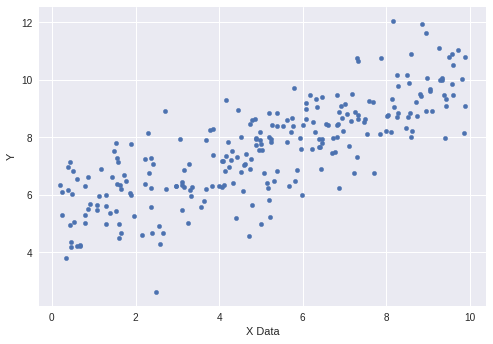

In [0]:
data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [0]:
batch_size = 8

In [0]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [0]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model = m*xph + b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
    
    sess.run(init)
    
    pas = 1000
    
    for i in range(pas):
        
        rand_ind = np.random.randint(len(X),size=batch_size)
        
        feed = {xph:X[rand_ind],yph:y[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [0]:
model_m

0.5041473

In [0]:
model_b

4.886323

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


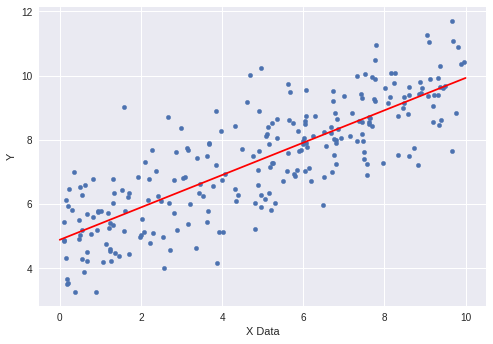

In [0]:
y_hat = X * model_m + model_b
data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(X,y_hat,'red')

**CLASSIFICATION**

In [0]:
fichierClass = files.upload()

In [0]:
data = pd.read_csv(io.StringIO(fichierClass['lo_rs.csv'].decode('utf-8')))


In [0]:
data.head()

In [0]:
data.columns

In [0]:
X = data.drop(['Purchased','User ID','Gender'],axis=1)

In [0]:
y = data['Purchased']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [0]:
age = tf.feature_column.numeric_column("Age")
salary = tf.feature_column.numeric_column("EstimatedSalary")


In [0]:
feat_cols = [age,salary]

In [0]:
input_fn = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=8,num_epochs=1000,shuffle=True)

In [0]:
modelClass = tf.estimator.LinearClassifier(feature_columns=feat_cols)

In [0]:
modelClass.train(input_fn=input_fn,steps=10000)

In [0]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [0]:
predictions = list(modelClass.predict(input_fn=pred_fn))

In [0]:
predictions[0]

In [0]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_preds))

**Utilisation des NN**

In [0]:
modelNN = tf.estimator.DNNClassifier(feature_columns=feat_cols, hidden_units=[100, 100, 100])

In [0]:
modelNN.train(input_fn=input_fn,steps=10000)

In [0]:
predictionsNN = list(modelNN.predict(input_fn=pred_fn))

In [0]:
predictionsNN[0]

In [0]:
final_predsNN = []
for pred in predictions:
    final_predsNN.append(pred['class_ids'][0])

In [0]:
print(classification_report(y_test,final_predsNN))